1. Load the synthetic dataset you have previously downloaded. This dataset has two features and a
class label. Use matplotlib’s scatter() function to plot the dataset on a 2D plane and color the
points based on their class label. How do you expect a decision tree to approach data distributed in
this way?

In [23]:
import pandas as pd

df = pd.read_csv("datasets/2d-synthetic.csv", delimiter=",")

['x0', 'x1']

Text(0, 0.5, 'y0')

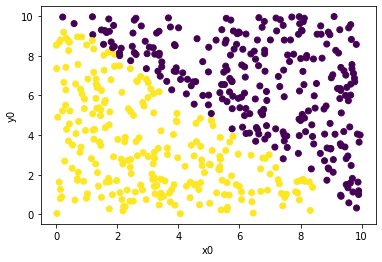

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
data = df.values[:, :2]
labels = df.values[:, 2]
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.xlabel('x0')
plt.ylabel('y0')

2. Build a “default” decision tree using the entire dataset, then visualize the learned model. What is
the tree learning, and why?

In [26]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier()
clf.fit(data, labels)
dot_code = export_graphviz(clf, feature_names=list(df.columns)[:2])
# Visualize the graph obtained by paste the string in the dot_code variable on http://www.webgraphviz.com/
print(dot_code)

digraph Tree {
node [shape=box] ;
0 [label="x0 <= 5.409\ngini = 0.499\nsamples = 500\nvalue = [259, 241]"] ;
1 [label="x1 <= 6.674\ngini = 0.378\nsamples = 265\nvalue = [67, 198]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x1 <= 5.518\ngini = 0.097\nsamples = 176\nvalue = [9, 167]"] ;
1 -> 2 ;
3 [label="x0 <= 5.076\ngini = 0.013\nsamples = 148\nvalue = [1, 147]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 136\nvalue = [0, 136]"] ;
3 -> 4 ;
5 [label="x0 <= 5.084\ngini = 0.153\nsamples = 12\nvalue = [1, 11]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 11\nvalue = [0, 11]"] ;
5 -> 7 ;
8 [label="x0 <= 3.577\ngini = 0.408\nsamples = 28\nvalue = [8, 20]"] ;
2 -> 8 ;
9 [label="gini = 0.0\nsamples = 20\nvalue = [0, 20]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 8\nvalue = [8, 0]"] ;
8 -> 10 ;
11 [label="x0 <= 1.58\ngini = 0.454\nsamples = 89\nvalue = [58, 31]"] ;
1 -> 11 ;
12 [label="x1 <= 9.018\n

3. Identify a preprocessing step that would make the decision tree “correctly” approach 
this problem

In [28]:
# The problem can be separated by a line in the form of x0 + x1 + K = 0
data_ = (data[:, 0] + data[:, 1])
data_ = data_.reshape((data_.shape[0], 1))
clf = DecisionTreeClassifier()
clf.fit(data_, labels)
dot_code = export_graphviz(clf, feature_names=['x0 + x1'])
# Visualize the graph obtained by paste the string in the dot_code variable on http://www.webgraphviz.com/
print(dot_code)


digraph Tree {
node [shape=box] ;
0 [label="x0 + x1 <= 10.033\ngini = 0.499\nsamples = 500\nvalue = [259, 241]"] ;
1 [label="gini = 0.0\nsamples = 241\nvalue = [0, 241]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 259\nvalue = [259, 0]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}
